In [54]:
import os
os.listdir('20227_unzip_1/1004128_20227_2_0/')

['fMRI']

In [ ]:
# pip install itk
# pip install itkwidgets
# pip install seaborn

In [1]:
#https://velog.io/@pear_min/Practice-01.-Neuroimaging-Visualize-3D-MRI-Brain-Scans-with-Python
# https://www.youtube.com/watch?v=Tc9ONZLBHP0
import numpy as np
import nibabel as nib   # 의료 및 뇌 영상 파일 형식에 대한 읽기/쓰기를 위한 모듈

import itk              # 2D 및 3D 이미지 시각화 라이브러리
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns   # Matplotl# ib를 기반으로 하는 파이썬 데이터 시각화 라이브러리


# 3D fMRI images¶

In [81]:
import nibabel as nib

# t-stat
image_path = '/bgq/xvol4/ml/jkwon1/20249/20249_unzip_1/1801092_20249_2_0/fMRI/tfMRI.feat/stats/tstat1.nii.gz'
image_obj = nib.load(image_path)

type(image_obj)

nibabel.nifti1.Nifti1Image

In [82]:
image_data = image_obj.get_fdata()

type(image_data)
image_data.shape

(88, 88, 64)

In [83]:
height, width, depth= image_data.shape

print(f'Dimensions of image data are:\n|height={height}\n|width={width}\n|depth={depth}\n')

Dimensions of image data are:
|height=88
|width=88
|depth=64



Plotting layer Layer 39 of Image


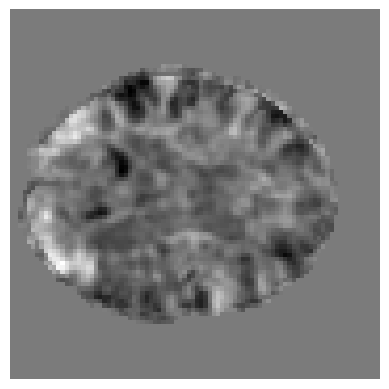

In [85]:
# 임의의 레이어 번호를 지정합니다.
maxval = 44    # including depth
i = np.random.randint(0, maxval)

# 확인할 볼륨을 지정합니다.
timepoint = 0

print(f'Plotting layer Layer {i} of Image')
plt.imshow(image_data[:,:,i],cmap='gray')
plt.axis('off')
plt.show()

In [86]:
# 데이터를 시각화하는 함수를 정의합니다.
def explore_3d_image(x, y, z):
    plt.figure(figsize=(8,10))
    # plt.title('Explore Layers of MRI', fontsize=18)
    
    plt.subplot(1, 3, 1) 
    plt.title('coronal view')
    plt.imshow(np.rot90(image_data[x,:,:]),cmap='gray')
    
    plt.subplot(1, 3, 2) 
    plt.title('saggital view')
    plt.imshow(np.rot90(image_data[:,y,:]),cmap='gray')
    
    plt.subplot(1, 3, 3) 
    plt.title('axial view')
    plt.imshow(np.rot90(image_data[:,:,z]),cmap='gray')
    
    
    
    #plt.axis('off')
    plt.tight_layout()
    plt.show()
    #return layer
 
# Run the ipywidgets interact() function to explore the data
interact(explore_3d_image, x=(0, image_data.shape[0]-1),y=(0, image_data.shape[1]-1),z=(0, image_data.shape[2]-1))

interactive(children=(IntSlider(value=43, description='x', max=87), IntSlider(value=43, description='y', max=8…

<function __main__.explore_3d_image(x, y, z)>

In [89]:
max_value = image_data.max()
min_value = image_data.min()
mean = image_data.mean()
std = image_data.std()
max_value,min_value, mean, std

(14.941648483276367,
 -12.850729942321777,
 -0.18408837166273895,
 1.2363190242384532)

(array([4.10000e+01, 5.94000e+02, 5.30500e+03, 3.48540e+04, 4.28336e+05,
        2.28130e+04, 2.83800e+03, 6.54000e+02, 1.47000e+02, 3.40000e+01]),
 array([-12.85072994, -10.0714921 ,  -7.29225426,  -4.51301641,
         -1.73377857,   1.04545927,   3.82469711,   6.60393496,
          9.3831728 ,  12.16241064,  14.94164848]),
 <BarContainer object of 10 artists>)

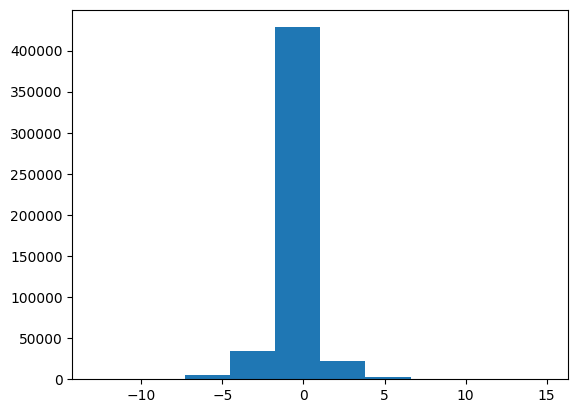

In [88]:
plt.hist(image_data.flatten())

# 4D fMRI images

### ukb rs-fmri

In [8]:
import nibabel as nib

image_path = '20227_unzip_1/1004128_20227_2_0/fMRI/rfMRI.nii.gz'
image_obj = nib.load(image_path)

type(image_obj)



nibabel.nifti1.Nifti1Image

In [63]:
os.listdir()

['zstat3.nii.gz',
 'tstat2.nii.gz',
 'pe3.nii.gz',
 'varcope3.nii.gz',
 'tstat5.nii.gz',
 'varcope5.nii.gz',
 'cope5.nii.gz',
 'zstat4.nii.gz',
 'tstat4.nii.gz',
 'smoothness',
 'varcope2.nii.gz',
 'pe4.nii.gz',
 'varcope4.nii.gz',
 'varcope1.nii.gz',
 'tstat1.nii.gz',
 'cope3.nii.gz',
 'pe1.nii.gz',
 'cope1.nii.gz',
 'pe2.nii.gz',
 'cope4.nii.gz',
 'tstat3.nii.gz',
 'zstat1.nii.gz',
 'cope2.nii.gz',
 'zstat2.nii.gz',
 'zstat5.nii.gz']

### ukb task-fMRI

In [96]:
import nibabel as nib

image_path = '/bgq/xvol4/ml/jkwon1/20249/20249_unzip_1/1801092_20249_2_0/fMRI/tfMRI.nii.gz'

# raw task fMRI
# '/bgq/xvol4/ml/jkwon1/20249/20249_unzip_1/1801092_20249_2_0/fMRI/tfMRI.nii.gz'
# preprocessed task fMRI
# '/bgq/xvol4/ml/jkwon1/20249/20249_unzip_1/1801092_20249_2_0/fMRI/tfMRI.feat/filtered_func_data.nii.gz'



image_obj = nib.load(image_path)

type(image_obj)

nibabel.nifti1.Nifti1Image

In [97]:
image_data = image_obj.get_fdata()

type(image_data)
image_data.shape

(88, 88, 64, 332)

In [98]:
height, width, depth, timepoints = image_data.shape

print(f'Dimensions of image data are:\n|height={height}\n|width={width}\n|depth={depth}\n|timepoints={timepoints}')

Dimensions of image data are:
|height=88
|width=88
|depth=64
|timepoints=332


Plotting layer Layer 35, Channel 0 of Image


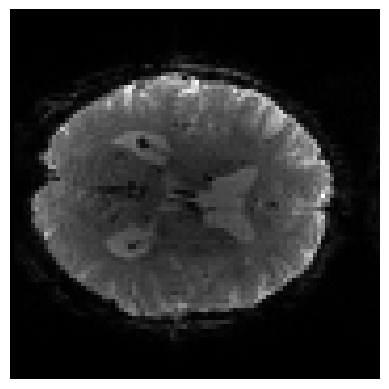

In [99]:
# 임의의 레이어 번호를 지정합니다.
maxval = 44    # including depth
i = np.random.randint(0, maxval)

# 확인할 볼륨을 지정합니다.
timepoint = 0

print(f'Plotting layer Layer {i}, Channel {channel} of Image')
plt.imshow(image_data[:,:,i,timepoint],cmap='gray')
plt.axis('off')
plt.show()

In [100]:
# 데이터를 시각화하는 함수를 정의합니다.
def explore_4d_image(x, y, z, timepoint):
    plt.figure(figsize=(8,10))
    # plt.title('Explore Layers of MRI', fontsize=18)
    
    plt.subplot(1, 3, 1) 
    plt.title('coronal view')
    plt.imshow(np.rot90(image_data[x,:,:,timepoint]),cmap='gray')
    
    plt.subplot(1, 3, 2) 
    plt.title('saggital view')
    plt.imshow(np.rot90(image_data[:,y,:,timepoint]),cmap='gray')
    
    plt.subplot(1, 3, 3) 
    plt.title('axial view')
    plt.imshow(np.rot90(image_data[:,:,z,timepoint]),cmap='gray')
    
    
    
    #plt.axis('off')
    plt.tight_layout()
    plt.show()
    #return layer
 
# Run the ipywidgets interact() function to explore the data
interact(explore_4d_image, x=(0, image_data.shape[0]-1),y=(0, image_data.shape[1]-1),z=(0, image_data.shape[2]-1),timepoint=(0,image_data.shape[3]-1))

interactive(children=(IntSlider(value=43, description='x', max=87), IntSlider(value=43, description='y', max=8…

<function __main__.explore_4d_image(x, y, z, timepoint)>

# histogram

In [101]:
max_value = image_data.max()
min_value = image_data.min()
max_value,min_value

(26780.0, 0.0)

(array([1.27251256e+08, 1.16658990e+07, 1.52829910e+07, 6.58312000e+06,
        2.55571700e+06, 8.66241000e+05, 2.79029000e+05, 5.20990000e+04,
        7.96700000e+03, 1.93000000e+02]),
 array([    0.,  2678.,  5356.,  8034., 10712., 13390., 16068., 18746.,
        21424., 24102., 26780.]),
 <BarContainer object of 10 artists>)

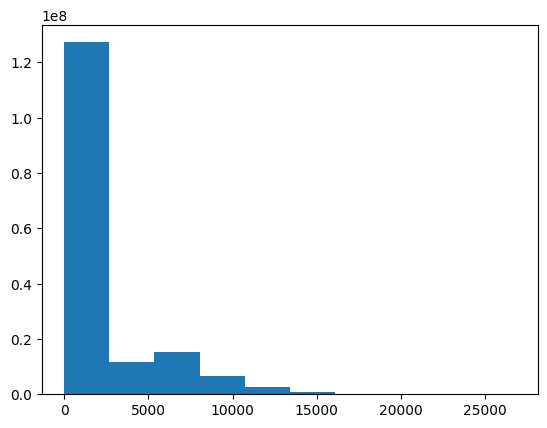

In [102]:
plt.hist(image_data.flatten())

 # signal plotting

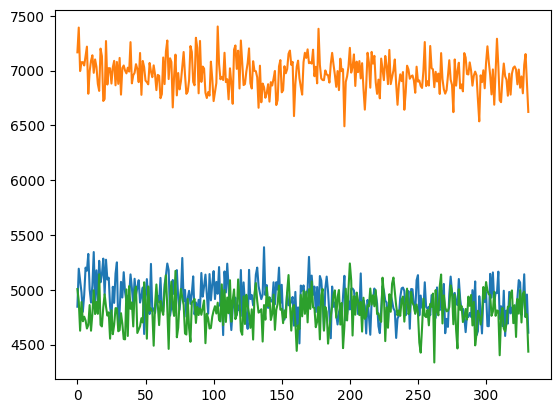

In [103]:
plt.plot(image_data[44,43,46,:])
plt.plot(image_data[30,43,46,:])
plt.plot(image_data[44,40,46,:])